<a href="https://colab.research.google.com/github/JMandal02/Data-Science_pwskills/blob/main/SVM_%26_Naive_Bayes_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Q1. What is a Support Vector Machine (SVM)?**
SVM is a supervised ML algorithm that finds the best separating **hyperplane** between classes by maximizing the **margin**.


## **Q2. What is the difference between Hard Margin and Soft Margin SVM4**
- **Hard Margin:** No misclassification allowed; works only with perfectly separable data.  
- **Soft Margin:** Allows misclassification; controlled by **C** parameter; handles noisy data.


## **Q3. What is the mathematical intuition behind SVM?**
SVM maximizes the margin between classes.  
Optimization objective:
\[
\min \|w\|^2 \quad \text{subject to correct class separation}
\]



## **Q4.  What is the role of Lagrange Multipliers in SVM4**
They convert the constrained optimization problem into its dual form, enabling:
- Kernel trick  
- Easier optimization  
- Support vector computation


## **Q5. What are Support Vectors in SVM?**
Data points closest to the decision boundary.  
They define the position of the hyperplane.



## **Q6.What is a Support Vector Classifier (SVC)?**
SVC is the classification version of SVM that uses margins and kernels to separate classes.



## **Q7. What is a Support Vector Regressor (SVR)**
SVR is the regression version of SVM that fits the best line with an **epsilon margin** around it.



## **Q8. What is the Kernel Trick in SVM ?**
A method to transform data into a higher dimension without explicit computation, allowing SVM to solve **non-linear** problems.


## **Q9. Compare Linear, Polynomial, and RBF Kernels**
- **Linear:** For linearly separable data.  
- **Polynomial:** Captures polynomial relationships.  
- **RBF:** Handles complex, non-linear patterns; most widely used.



## **Q10.What is the effect of the C parameter in SVM?**
- **High C:** Low tolerance for misclassification → tight margin.  
- **Low C:** More tolerance → wider margin.


## **What is the role of the Gamma parameter in RBF Kernel SVM?**
Gamma controls how far the influence of a training point reaches.  
- **High gamma:** Complex, overfitted boundary  
- **Low gamma:** Smooth, simple boundary



## **What is the Naïve Bayes classifier, and why is it called "Naïve"?**
A probabilistic classifier based on Bayes’ Theorem.  
It is “naïve” because it assumes **all features are independent**.



## **Q13. What is Bayes' Theorem?**
\[
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
\]



## **Q14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.**
- **Gaussian NB:** For continuous numeric data.  
- **Multinomial NB:** For word counts (text).  
- **Bernoulli NB:** For binary features (0/1).



## **Q15.When should you use Gaussian Naïve Bayes over other variants?**
When features are **continuous** and follow a **normal distribution** (e.g., sensor readings).


## **Q16. What are the key assumptions made by Naïve Bayes?**
- All features are independent.  
- Features contribute equally.



## **Q17. What are the advantages and disadvantages of Naïve Bayes?**
**Advantages:** Fast, simple, works well for text.  
**Disadvantages:** Independence assumption is unrealistic.



## **Q18.  Why is Naïve Bayes a good choice for text classification?**
Text features (word counts) are mostly independent, making NB efficient and accurate for text.



## **Compare SVM and Naïve Bayes for classification tasks:**
- **SVM:** Works well for high-dimensional complex data; slower.  
- **NB:** Faster, works well with text and naive assumptions.



## **Q20. How does Laplace Smoothing help in Naïve Bayes?**
Prevents zero probability by adding **+1** to word counts, improving predictions.






In [1]:
# Q21: Train an SVM Classifier on the Iris dataset and evaluate accuracy

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [2]:
# Q22: Train SVM with Linear and RBF kernels on Wine dataset and compare accuracy

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_linear = SVC(kernel='linear', random_state=42)
clf_rbf = SVC(kernel='rbf', random_state=42)

clf_linear.fit(X_train, y_train)
clf_rbf.fit(X_train, y_train)

y_pred_linear = clf_linear.predict(X_test)
y_pred_rbf = clf_rbf.predict(X_test)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))


Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556


In [3]:
# Q23: Train an SVR on a housing dataset and evaluate using MSE

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 1.3320115421348744


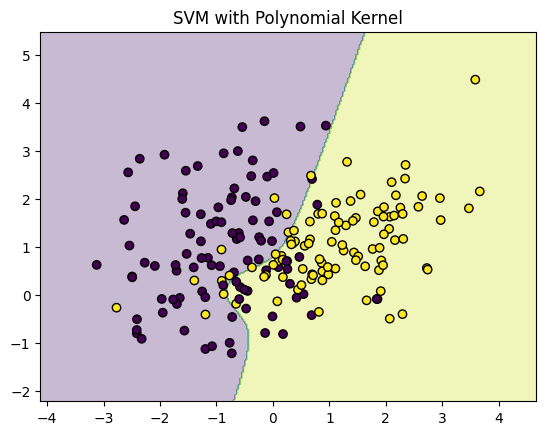

In [4]:
# Q24: Train an SVM with Polynomial Kernel and visualize decision boundary (2D toy data)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

clf = SVC(kernel='poly', degree=3)
clf.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min,x_max,300),
                     np.linspace(y_min,y_max,300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
plt.title("SVM with Polynomial Kernel")
plt.show()


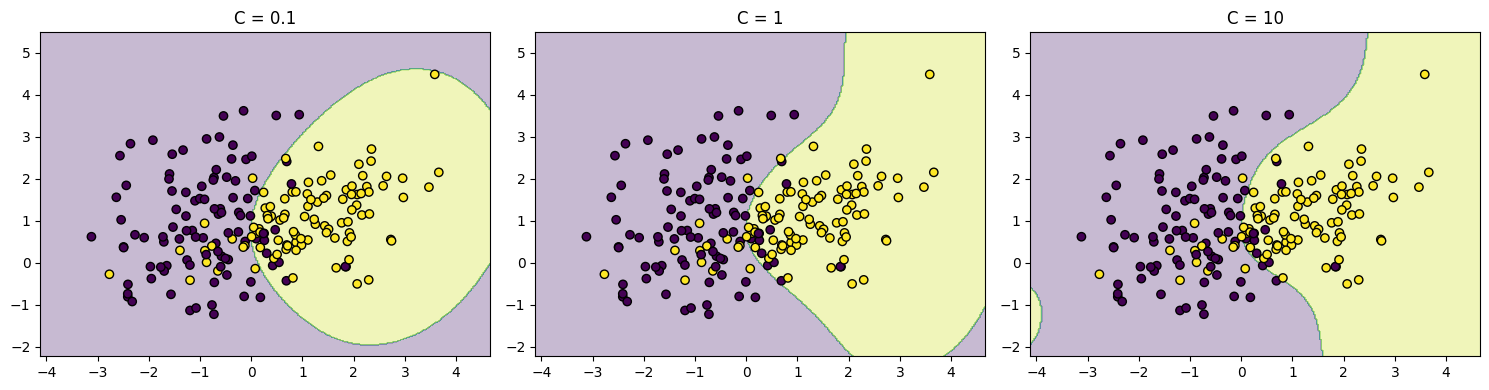

In [5]:
# Q25: Train SVM with different C values and compare decision boundaries (2D toy data)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

C_values = [0.1, 1, 10]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, C in zip(axes, C_values):
    clf = SVC(kernel='rbf', C=C)
    clf.fit(X, y)

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,300),
                         np.linspace(y_min,y_max,300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    ax.set_title(f"C = {C}")

plt.tight_layout()
plt.show()


In [6]:
# Q26: Apply feature scaling before SVM and compare with unscaled data (Iris dataset)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without scaling
clf_no_scale = SVC(kernel='rbf', random_state=42)
clf_no_scale.fit(X_train, y_train)
y_pred_no = clf_no_scale.predict(X_test)
print("Accuracy without scaling:", accuracy_score(y_test, y_pred_no))

# With scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

clf_scale = SVC(kernel='rbf', random_state=42)
clf_scale.fit(X_train_s, y_train)
y_pred_s = clf_scale.predict(X_test_s)
print("Accuracy with scaling:", accuracy_score(y_test, y_pred_s))


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [7]:
# Q26: Apply feature scaling before SVM and compare with unscaled data (Iris dataset)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without scaling
clf_no_scale = SVC(kernel='rbf', random_state=42)
clf_no_scale.fit(X_train, y_train)
y_pred_no = clf_no_scale.predict(X_test)
print("Accuracy without scaling:", accuracy_score(y_test, y_pred_no))

# With scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

clf_scale = SVC(kernel='rbf', random_state=42)
clf_scale.fit(X_train_s, y_train)
y_pred_s = clf_scale.predict(X_test_s)
print("Accuracy with scaling:", accuracy_score(y_test, y_pred_s))


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [8]:
# Q27: Train SVM Classifier and tune hyperparameters using GridSearchCV (Iris dataset)

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))


Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.975
Test Accuracy: 1.0


In [9]:
# Q28: Train SVM on imbalanced dataset with class weighting

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1],
                           n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_no_weight = SVC()
clf_no_weight.fit(X_train, y_train)
y_pred_no = clf_no_weight.predict(X_test)
print("Accuracy without class weight:", accuracy_score(y_test, y_pred_no))

clf_weight = SVC(class_weight='balanced')
clf_weight.fit(X_train, y_train)
y_pred_w = clf_weight.predict(X_test)
print("Accuracy with class weight:", accuracy_score(y_test, y_pred_w))


Accuracy without class weight: 0.895
Accuracy with class weight: 0.895


In [10]:
# Q29: SVM using One-vs-Rest (OvR) and One-vs-One (OvO) on Wine dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ovr = OneVsRestClassifier(SVC())
ovo = OneVsOneClassifier(SVC())

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

y_pred_ovr = ovr.predict(X_test)
y_pred_ovo = ovo.predict(X_test)

print("OvR Accuracy:", accuracy_score(y_test, y_pred_ovr))
print("OvO Accuracy:", accuracy_score(y_test, y_pred_ovo))


OvR Accuracy: 0.7777777777777778
OvO Accuracy: 0.8333333333333334


In [11]:
# Q30: SVM with Linear, Polynomial, and RBF kernels on Breast Cancer dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf']

for k in kernels:
    clf = SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Kernel: {k}, Accuracy: {accuracy_score(y_test, y_pred)}")


Kernel: linear, Accuracy: 0.956140350877193
Kernel: poly, Accuracy: 0.9473684210526315
Kernel: rbf, Accuracy: 0.9473684210526315


In [12]:
# Q31: SVM with Stratified K-Fold Cross-Validation (Breast Cancer dataset)

from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

clf = SVC(kernel='rbf')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=skf)

print("CV Scores:", scores)
print("Average Accuracy:", scores.mean())


CV Scores: [0.93859649 0.87719298 0.89473684 0.93859649 0.92035398]
Average Accuracy: 0.9138953578636858


In [13]:
# Q32: SVM – evaluate Precision, Recall, and F1-score (Breast Cancer dataset)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Precision: 0.922077922077922
Recall: 1.0
F1-Score: 0.9594594594594594


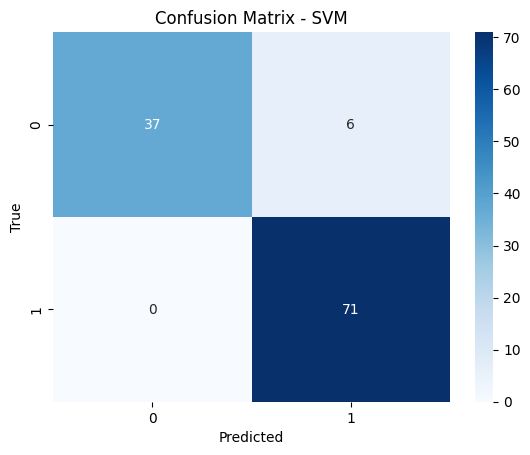

In [14]:
# Q33: SVM – visualize Confusion Matrix using seaborn (Breast Cancer dataset)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM")
plt.show()


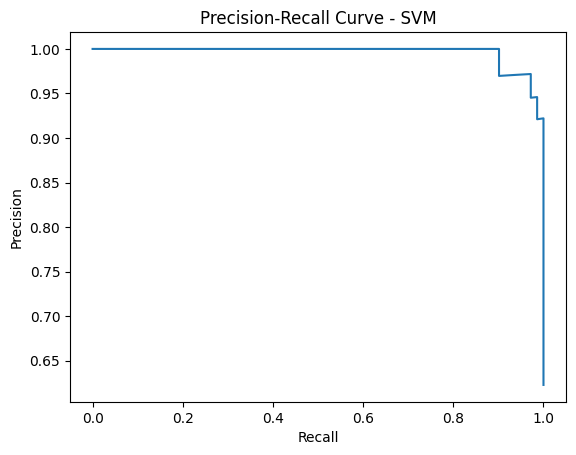

In [15]:
# Q34: SVM – visualize Precision-Recall Curve (Breast Cancer dataset)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='rbf', probability=True)
clf.fit(X_train, y_train)

y_scores = clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - SVM")
plt.show()



In [16]:
# Q35: Train an SVR and evaluate using MAE (California Housing)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 0.8599506583445761


In [17]:
# Q36: Perform Recursive Feature Elimination (RFE) before SVM and compare accuracy (Breast Cancer)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without RFE
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy without RFE:", accuracy_score(y_test, y_pred))

# With RFE
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

clf_rfe = SVC(kernel='linear')
clf_rfe.fit(X_train_r, y_train_r)
y_pred_rfe = clf_rfe.predict(X_test_r)
print("Accuracy with RFE:", accuracy_score(y_test_r, y_pred_rfe))


Accuracy without RFE: 0.956140350877193
Accuracy with RFE: 0.9736842105263158


In [18]:
# Q37: Train Gaussian Naive Bayes on Breast Cancer dataset and evaluate accuracy

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9736842105263158


In [19]:
# Q38: Multinomial Naive Bayes for text classification on 20 Newsgroups

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)
y_pred = mnb.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8137931034482758


In [20]:
# Q39: Bernoulli Naive Bayes for binary features

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_classification(n_samples=500, n_features=20, random_state=42)
X_bin = (X > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.2, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9


In [21]:
# Q40: Naive Bayes predictions before and after Laplace smoothing (alpha)

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_classification(n_samples=500, n_features=10, random_state=42)
X_pos = (X - X.min()) + 1  # make positive for Multinomial

X_train, X_test, y_train, y_test = train_test_split(X_pos, y, test_size=0.2, random_state=42)

nb_no_smooth = MultinomialNB(alpha=0.0)
nb_smooth = MultinomialNB(alpha=1.0)

nb_no_smooth.fit(X_train, y_train)
nb_smooth.fit(X_train, y_train)

y_pred_no = nb_no_smooth.predict(X_test)
y_pred_s = nb_smooth.predict(X_test)

print("Accuracy without smoothing:", accuracy_score(y_test, y_pred_no))
print("Accuracy with Laplace smoothing:", accuracy_score(y_test, y_pred_s))


Accuracy without smoothing: 0.84
Accuracy with Laplace smoothing: 0.84


In [22]:
# Q41: Naive Bayes – evaluate ROC-AUC score (Breast Cancer dataset)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_proba = gnb.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


ROC-AUC: 0.9983622666229938


In [23]:
# Q42: Naive Bayes – evaluate Log Loss (Cross-Entropy Loss) (Breast Cancer dataset)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_proba = gnb.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_proba))


Log Loss: 0.2037342715214191


In [24]:
# Q43: Naive Bayes spam detection using a simple email dataset (toy example)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

emails = [
    "Win money now", "Limited time offer", "Hi, how are you?",
    "Your invoice is attached", "You have won a lottery", "Meeting agenda attached",
    "Claim your free prize", "Let's catch up tomorrow"
]
labels = [1, 1, 0, 0, 1, 0, 1, 0]  # 1 = spam, 0 = ham

X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.25, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5


In [25]:
# Q44: Perform feature selection before Naive Bayes and compare accuracy (Breast Cancer dataset)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without feature selection
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy without feature selection:", accuracy_score(y_test, y_pred))

# With feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_new, y, test_size=0.2, random_state=42)

gnb2 = GaussianNB()
gnb2.fit(X_train_s, y_train_s)
y_pred_s = gnb2.predict(X_test_s)
print("Accuracy with feature selection:", accuracy_score(y_test_s, y_pred_s))


Accuracy without feature selection: 0.9736842105263158
Accuracy with feature selection: 0.9736842105263158


In [26]:
# Q45: Train SVM and Naive Bayes on same dataset and compare performance (Breast Cancer)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='rbf')
nb_clf = GaussianNB()

svm_clf.fit(X_train, y_train)
nb_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)
y_pred_nb = nb_clf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


SVM Accuracy: 0.9473684210526315
Naive Bayes Accuracy: 0.9736842105263158


In [27]:
# Q46: Naive Bayes with different prior probabilities (Breast Cancer dataset)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_counts = np.bincount(y_train)
class_prior = class_counts / class_counts.sum()
print("Estimated class prior:", class_prior)

gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)
y_pred_default = gnb_default.predict(X_test)

gnb_custom = GaussianNB(priors=[0.3, 0.7])
gnb_custom.fit(X_train, y_train)
y_pred_custom = gnb_custom.predict(X_test)

print("Accuracy with default priors:", accuracy_score(y_test, y_pred_default))
print("Accuracy with custom priors:", accuracy_score(y_test, y_pred_custom))


Estimated class prior: [0.37142857 0.62857143]
Accuracy with default priors: 0.9736842105263158
Accuracy with custom priors: 0.9649122807017544
